In [ ]:
#pip install tensorflow tensorflow-hub

In [ ]:
#pip install wordcloud matplotlib

In [ ]:
#pip install tensorflow-text

In [ ]:
#pip install tensorflow --quiet


In [ ]:
#pip install -U

In [ ]:
#pip install "tf-models-official==2.13.*"

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split


pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_colwidth', None)

import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/Users/ranjitsingh/Documents/Data Science/Nexthikes-Projects-files/Project7/twitter_disaster (1).csv')
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1


In [3]:
df.shape

(7613, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [5]:
df.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [6]:
df = df.dropna()

In [7]:
df.shape

(5080, 5)

In [8]:
df.head()

,id,keyword,location,text,target
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/lHYXEOHY6C,1
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT http://t.co/YAo1e0xngw,0
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set ablaze in Aba. http://t.co/2nndBGwyEi,1
34,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS ABLAZE http://t.co/qqsmshaJ3N,0


In [9]:
df.groupby('target').describe()

id                                                              
          count     mean      std    min      25%      50%      75%       max
target                                                                       
0      2884.000 5307.596 3151.028 49.000 2555.000 5291.500 8056.500 10833.000
1      2196.000 5537.807 3066.045 48.000 3011.500 5487.500 8133.250 10823.000

# Cleaning Tweets

In [11]:
def clean_tweet(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # remove links
    text = re.sub(r'@\w+', '', text)                     # remove mentions
    text = text.lower()                                  # lowercase
    text = re.sub(r'\s+', ' ', text).strip()             # remove extra spaces
    text = re.sub(r'#', '', text)                        # Remove hashtags, keep word
    text = re.sub(r'[^A-Za-z\s]', '', text)              #Remove special characters, numbers, punctuation, keep only text

    return text


In [12]:
df["cleaned_tweet"] = df["text"].apply(clean_tweet)

In [13]:
df = df.drop(columns= ['id','text'])

In [14]:
df.head()

,keyword,location,target,cleaned_tweet
31,ablaze,Birmingham,1,wholesale markets ablaze
32,ablaze,Est. September 2012 - Bristol,0,we always try to bring the heavy metal rt
33,ablaze,AFRICA,1,africanbaze breaking newsnigeria flag set ablaze in aba
34,ablaze,"Philadelphia, PA",0,crying out for more set me ablaze
35,ablaze,"London, UK",0,on plus side look at the sky last night it was ablaze


In [15]:
df['target'].value_counts(dropna= False)

target
0    2884
1    2196
Name: count, dtype: int64

# Distribution of Non-Disaster (0), Disaster (1) Tweets

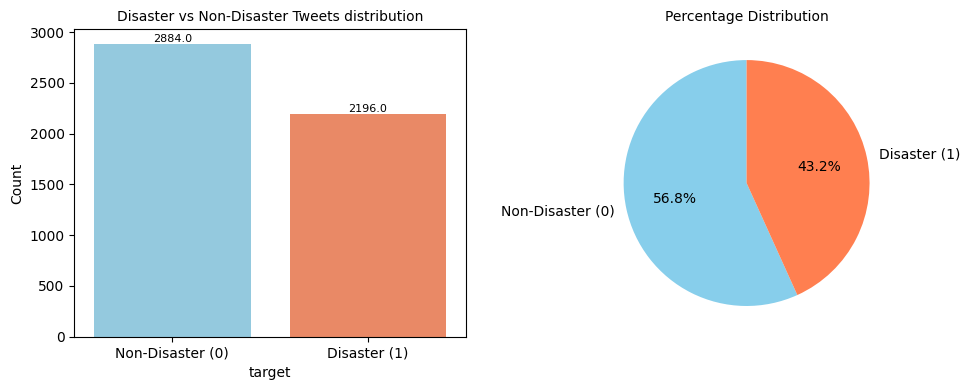

Non-disaster tweets: 2884 (56.77%)
Disaster tweets: 2196 (43.23%)


In [17]:
# Calculate counts and percentages
target_counts = df['target'].value_counts()
percentages = df['target'].value_counts(normalize=True) * 100


# Plot side-by-side using subplots
fig, axes = plt.subplots(1, 2, figsize=(10,4))

# Count Bar Plot
sns.countplot(data=df, x="target", palette=["#87CEEB", "#FF7F50"], ax=axes[0])
axes[0].set_xticklabels(['Non-Disaster (0)', 'Disaster (1)'])
axes[0].set_title("Disaster vs Non-Disaster Tweets distribution", fontsize=10)
axes[0].set_ylabel("Count")

# Add counts on top of bars
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height()}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='bottom', fontsize=8)

# Percentage Pie Chart
labels = ['Non-Disaster (0)', 'Disaster (1)']
colors = ["#87CEEB", "#FF7F50"]
axes[1].pie(percentages, labels=labels, autopct='%0.1f%%',
            startangle=90, colors=colors, textprops={'fontsize':10})
axes[1].set_title("Percentage Distribution", fontsize=10)

plt.tight_layout()
plt.show()

# Print counts and percentages
print(f"Non-disaster tweets: {target_counts.get(0,0)} ({target_counts.get(0,0)/len(df)*100:.2f}%)")
print(f"Disaster tweets: {target_counts.get(1,0)} ({target_counts.get(1,0)/len(df)*100:.2f}%)")


# Text length analysis

In [34]:
# Number of characters in each tweet
df['char_count'] = df['cleaned_tweet'].apply(len)

# Number of words in each tweet
df['word_count'] = df['cleaned_tweet'].apply(lambda x: len(x.split()))

# Checking first few rows
df[['cleaned_tweet', 'char_count', 'word_count']].head()

,cleaned_tweet,char_count,word_count
31,wholesale markets ablaze,24,3
32,we always try to bring the heavy metal rt,41,9
33,africanbaze breaking newsnigeria flag set ablaze in aba,55,8
34,crying out for more set me ablaze,33,7
35,on plus side look at the sky last night it was ablaze,53,12


In [36]:
# Character count stats
print("Character count stats:")
print(df['char_count'].describe())

# Word count stats
print("\nWord count stats:")
print(df['word_count'].describe())

Character count stats:
count   5080.000
mean      78.628
std       30.769
min        4.000
25%       56.000
50%       80.000
75%      104.000
max      143.000
Name: char_count, dtype: float64

Word count stats:
count   5080.000
mean      13.589
std        5.724
min        1.000
25%        9.000
50%       14.000
75%       17.000
max       30.000
Name: word_count, dtype: float64


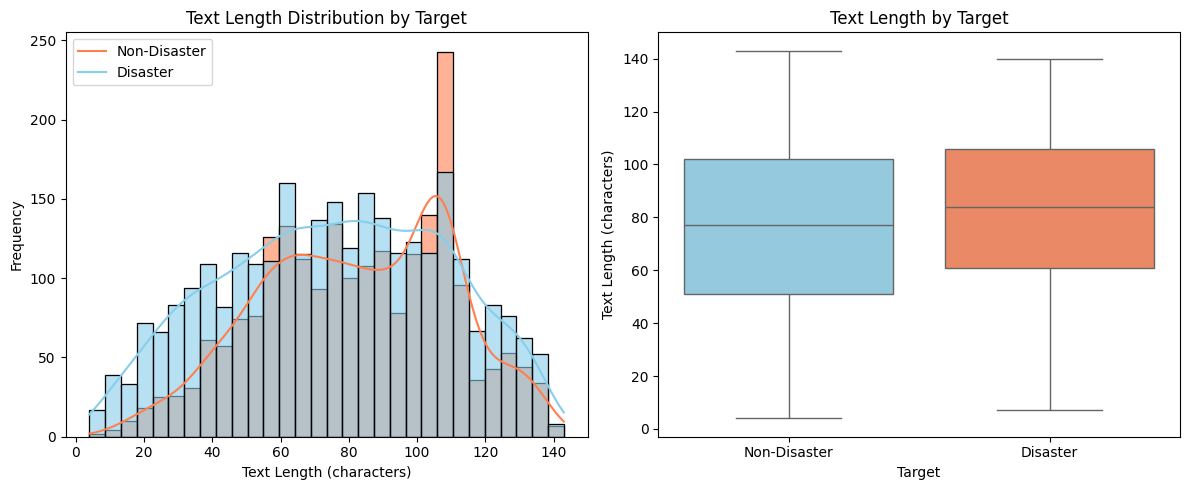

Average text length for disaster tweets: 82.33 characters
Average text length for non-disaster tweets: 75.80 characters


In [163]:
# Create text_length column (number of characters)
df['text_length'] = df['cleaned_tweet'].apply(len)

plt.figure(figsize=(12,5))

# Histogram by target
plt.subplot(1,2,1)
sns.histplot(data=df, x='text_length', hue='target', bins=30, kde=True, palette=["#87CEEB", "#FF7F50"], alpha=0.6)
plt.title('Text Length Distribution by Target', fontsize=12)
plt.xlabel('Text Length (characters)')
plt.ylabel('Frequency')
plt.legend(labels=['Non-Disaster', 'Disaster'])

# Boxplot by target
plt.subplot(1,2,2)
sns.boxplot(data=df, x='target', y='text_length', palette=["#87CEEB", "#FF7F50"])
plt.title('Text Length by Target', fontsize=12)
plt.xlabel('Target')
plt.ylabel('Text Length (characters)')
plt.xticks([0,1], ['Non-Disaster', 'Disaster'])

plt.tight_layout()
plt.show()

# Average text length
avg_length_disaster = df[df['target']==1]['text_length'].mean()
avg_length_non_disaster = df[df['target']==0]['text_length'].mean()

print(f"Average text length for disaster tweets: {avg_length_disaster:.2f} characters")
print(f"Average text length for non-disaster tweets: {avg_length_non_disaster:.2f} characters")

In [39]:
df.head()

,keyword,location,target,cleaned_tweet,char_count,word_count,text_length
31,ablaze,Birmingham,1,wholesale markets ablaze,24,3,24
32,ablaze,Est. September 2012 - Bristol,0,we always try to bring the heavy metal rt,41,9,41
33,ablaze,AFRICA,1,africanbaze breaking newsnigeria flag set ablaze in aba,55,8,55
34,ablaze,"Philadelphia, PA",0,crying out for more set me ablaze,33,7,33
35,ablaze,"London, UK",0,on plus side look at the sky last night it was ablaze,53,12,53


keyword
collision           36
whirlwind           33
armageddon          32
fatalities          32
flames              31
emergency%20plan    31
derailed            31
outbreak            31
sandstorm           31
danger              30
Name: count, dtype: int64


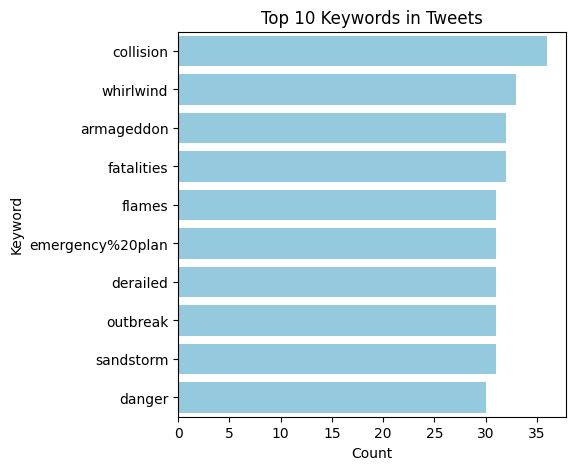

In [40]:
# Count occurrences of each keyword
keyword_counts = df['keyword'].value_counts()

# Display top 10 keywords
print(keyword_counts.head(10))

top_keywords = keyword_counts.head(10)
plt.figure(figsize=(5,5))
sns.barplot(x=top_keywords.values, y=top_keywords.index,  color="#87CEEB")
plt.title("Top 10 Keywords in Tweets")
plt.xlabel("Count")
plt.ylabel("Keyword")
plt.show()


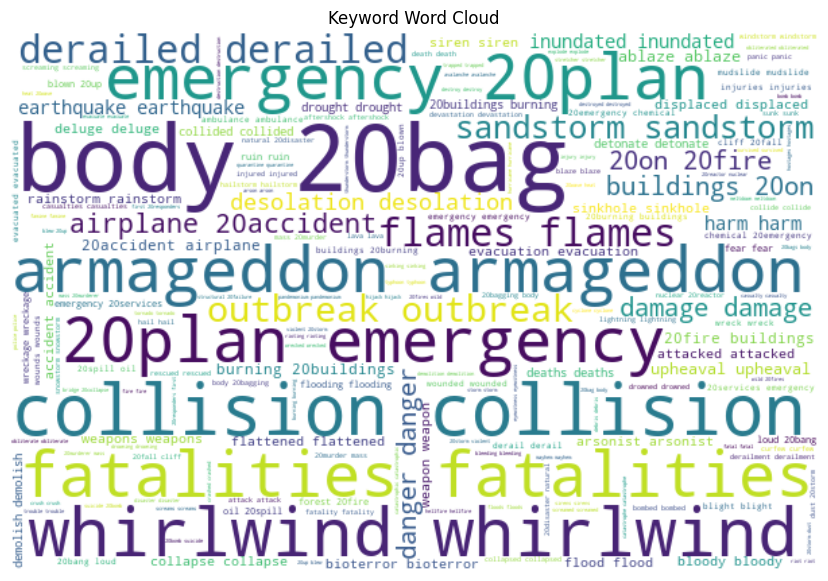

In [44]:
# Combine all keywords into a single string

all_keywords = ' '.join(df['keyword'].dropna())
wordcloud = WordCloud(width=600, height=400, background_color='white').generate(all_keywords)

plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Keyword Word Cloud")
plt.show()

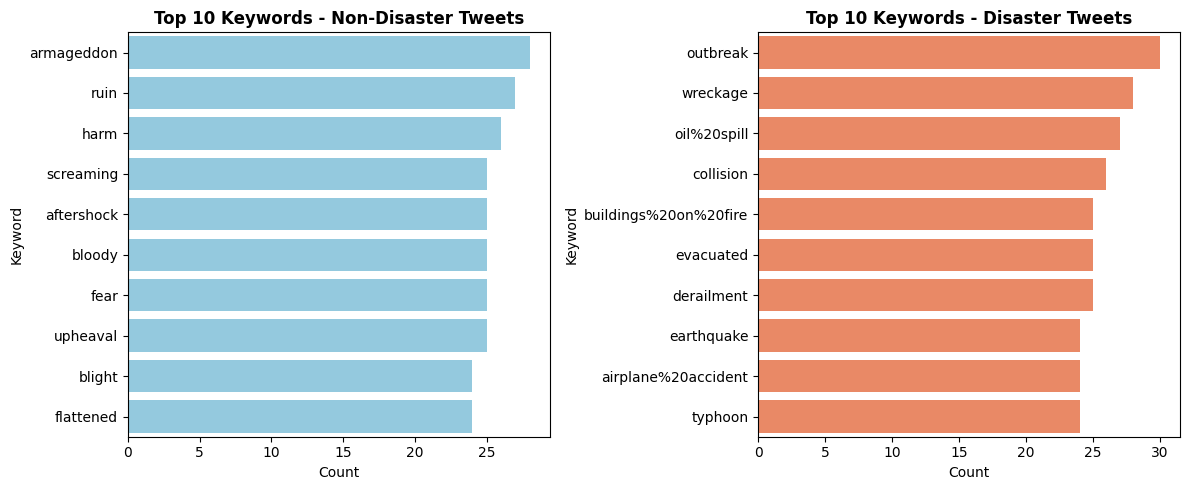

In [46]:
# Separate disaster and non-disaster
disaster_keywords = df[df['target']==1]['keyword']
non_disaster_keywords = df[df['target']==0]['keyword']

# Top 10 keywords for each class
top_disaster = disaster_keywords.value_counts().head(10)
top_non_disaster = non_disaster_keywords.value_counts().head(10)

# Plot Top Keywords for Disaster
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.barplot(x=top_non_disaster.values, y=top_non_disaster.index, color="#87CEEB")
plt.title("Top 10 Keywords - Non-Disaster Tweets", fontsize=12, fontweight='bold')
plt.xlabel("Count")
plt.ylabel("Keyword")

plt.subplot(1,2,2)
sns.barplot(x=top_disaster.values, y=top_disaster.index, color="#FF7F50")
plt.title("Top 10 Keywords - Disaster Tweets", fontsize=12, fontweight='bold')
plt.xlabel("Count")
plt.ylabel("Keyword")

plt.tight_layout()
plt.show()


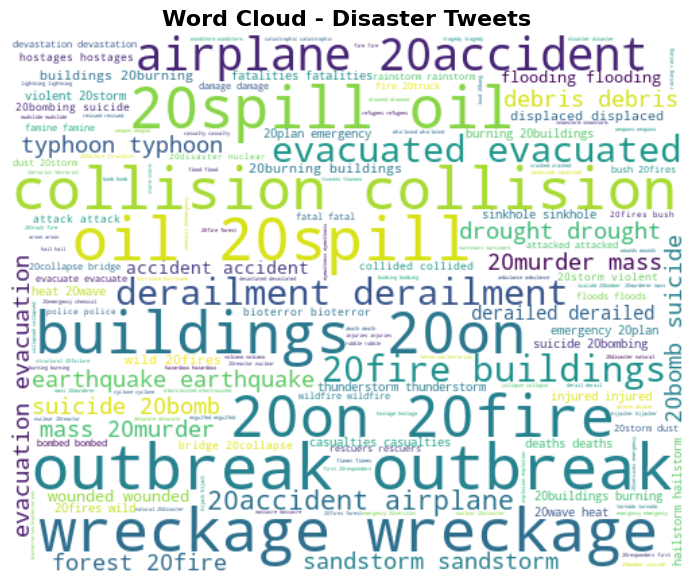

In [47]:
# Word Cloud for Disaster Tweets
disaster_keywords = ' '.join(disaster_keywords)
wordcloud_disaster = WordCloud(width=500, height=400, background_color='white').generate(disaster_keywords)

plt.figure(figsize=(15,7))
plt.imshow(wordcloud_disaster, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - Disaster Tweets", fontsize=16, fontweight='bold')
plt.show()

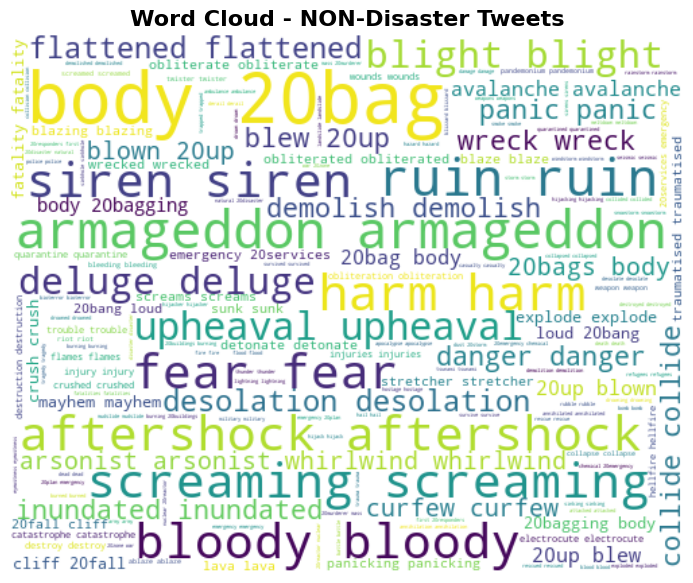

In [50]:
# Word Cloud for NON-Disaster Tweets
Non_disaster_keywords = ' '.join(non_disaster_keywords)
wordcloud_non_disaster = WordCloud(width=500, height=400, background_color='white').generate(Non_disaster_keywords)

plt.figure(figsize=(15,7))
plt.imshow(wordcloud_non_disaster, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - NON-Disaster Tweets", fontsize=16, fontweight='bold')
plt.show()

# Balancing DF with equal size of disaster and non-disaster tweets

In [53]:
# 0 for non-disaster, 1 for disaster
df_non_disaster = df[df['target']== 0]
df_non_disaster.shape

(2884, 7)

In [55]:
df_disaster = df[df['target']== 1]
df_disaster.shape

(2196, 7)

In [57]:
df_non_disaster_downsampled = df_non_disaster.sample(df_disaster.shape[0])
df_non_disaster_downsampled.shape

(2196, 7)

In [59]:
df_non_disaster_downsampled.head(2)

,keyword,location,target,cleaned_tweet,char_count,word_count,text_length
4668,inundation,Asia European Continent Korea,0,megalpolis area petting party shiver fear instant global inundation overflow was commencement write,102,13,102
4803,loud%20bang,{Detailed},0,a loud bang he froze on the spot as slowly every head turned towards him one of the things he hated the most was to be,119,26,119


In [61]:
df_balanced = pd.concat([df_non_disaster_downsampled, df_disaster])
df_balanced.shape

(4392, 7)

In [63]:
df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4392 entries, 4668 to 7572
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   keyword        4392 non-null   object
 1   location       4392 non-null   object
 2   target         4392 non-null   int64 
 3   cleaned_tweet  4392 non-null   object
 4   char_count     4392 non-null   int64 
 5   word_count     4392 non-null   int64 
 6   text_length    4392 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 274.5+ KB


In [65]:
df_balanced['cleaned_tweet'] = df_balanced['cleaned_tweet'].astype(str)

# Spliting the dataset into training and testing sets 

In [68]:
X = df_balanced['cleaned_tweet']
X.head()

4668                     megalpolis area petting party shiver fear instant  global inundation overflow was commencement write  
4803    a loud bang he froze on the spot as slowly every head turned towards him one of the things he hated the most was to be 
640                                                                                                                   craving u
5014                                             i think the mudslide cake lady will go and the hipster will unfortunately stay
4920                                                         editor in chief releases issue  of ramag fashion models and mayhem
Name: cleaned_tweet, dtype: object

In [70]:
y = df_balanced['target']
y.head()

4668    0
4803    0
640     0
5014    0
4920    0
Name: target, dtype: int64

In [72]:
y.value_counts()

target
0    2196
1    2196
Name: count, dtype: int64

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=df_balanced['target'],test_size=0.2,random_state=55)

In [76]:
X_train.shape

(3513,)

In [78]:
X_train.head()

5740    video were picking up bodies from water rescuers are searching for hundreds of migrants in the bbc news
7574                                                                      cramer  words that wrecked dis stock 
6245                                              cooler than freddie jackson sippin a milkshake in a snowstorm
7395                                   had major windstorm thunder and some rain down here near jacksoncalm now
1043                                                                       lab today ready for these body bags 
Name: cleaned_tweet, dtype: object

In [80]:
X_test.shape

(879,)

In [82]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from tensorflow.keras.callbacks import EarlyStopping


# Using Text Vectorization :
### The TextVectorization layer in Keras automatically does everything that Tokenizer + texts_to_sequences + pad_sequences
### Tokenization – splits sentences into words/subwords
### Integer encoding – converts each word to a unique integer index
### Padding/truncation – ensures sequences have the same length (output_sequence_length)

In [84]:
num_words = 10000
max_len = 200

# Created TextVectorization layer

vectorize_layer = layers.TextVectorization(
    max_tokens=num_words,
    output_mode='int',
    output_sequence_length=max_len
)
vectorize_layer.adapt(X_train)


In [87]:
# Create tf.data.Dataset

batch_size = 64

train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_ds = train_ds.shuffle(buffer_size=len(X_train)).batch(batch_size)

val_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test))
val_ds = val_ds.batch(batch_size)


In [89]:
model = keras.Sequential([
    vectorize_layer,
    layers.Embedding(input_dim=num_words, output_dim=300, input_length=max_len),  
    layers.Bidirectional(layers.LSTM(64, return_sequences=True, recurrent_dropout=0.2)),
    layers.GlobalMaxPooling1D(),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.5), 
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(32, activation='relu'),  # new layer
    layers.Dropout(0.5), 
    layers.Dense(1, activation='sigmoid')
])

optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Using EarlyStopping to prevents overfitting

#early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

early_stop = EarlyStopping(monitor='val_loss',patience=4,restore_best_weights=True)


In [91]:
# Training model with EarlyStopping

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
    verbose=2,
    callbacks=[early_stop]  # <-- here
)


Epoch 1/20
55/55 - 58s - 1s/step - accuracy: 0.5075 - loss: 2.0172 - val_accuracy: 0.7213 - val_loss: 1.3903
Epoch 2/20
55/55 - 44s - 808ms/step - accuracy: 0.6391 - loss: 1.0734 - val_accuracy: 0.7076 - val_loss: 0.7740
Epoch 3/20
55/55 - 41s - 740ms/step - accuracy: 0.8503 - loss: 0.5463 - val_accuracy: 0.7929 - val_loss: 0.5585
Epoch 4/20
55/55 - 41s - 753ms/step - accuracy: 0.9263 - loss: 0.3058 - val_accuracy: 0.7770 - val_loss: 0.5859
Epoch 5/20
55/55 - 29s - 530ms/step - accuracy: 0.9562 - loss: 0.1947 - val_accuracy: 0.7520 - val_loss: 0.7632
Epoch 6/20
55/55 - 32s - 576ms/step - accuracy: 0.9730 - loss: 0.1391 - val_accuracy: 0.7497 - val_loss: 0.7879
Epoch 7/20
55/55 - 32s - 585ms/step - accuracy: 0.9798 - loss: 0.1049 - val_accuracy: 0.7645 - val_loss: 0.8844


# Evaluate the model

In [93]:
train_loss, train_acc = model.evaluate(train_ds, verbose=2)
print(f'Training Accuracy: {train_acc * 100:.2f}%')

55/55 - 7s - 121ms/step - accuracy: 0.9294 - loss: 0.3157
Training Accuracy: 92.94%


In [94]:
test_loss, test_acc = model.evaluate(val_ds, verbose=2)
print(f'Test Accuracy: {test_acc * 100:.2f}%')

14/14 - 2s - 150ms/step - accuracy: 0.7929 - loss: 0.5585
Test Accuracy: 79.29%


In [98]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [100]:
y_pred_prob = model.predict(val_ds)
y_pred = (y_pred_prob > 0.5).astype(int)

14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 190ms/step


In [101]:
y_true = np.concatenate([y.numpy() for x, y in val_ds], axis=0)

2025-09-24 15:20:33.102571: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [104]:
y_true = y_true.flatten()
y_pred = y_pred.flatten()

# Calculating metrics

In [112]:
acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred)
rec = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

In [114]:
print(f"Accuracy: {acc*100:.2f}%")
print(f"Precision: {prec*100:.2f}%")
print(f"Recall: {rec*100:.2f}%")
print(f"F1-score: {f1*100:.2f}%")

Accuracy: 79.29%
Precision: 82.58%
Recall: 74.32%
F1-score: 78.23%


# Confusion Matrix

In [117]:
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[370  69]
 [113 327]]


Text(45.722222222222214, 0.5, 'Truth')

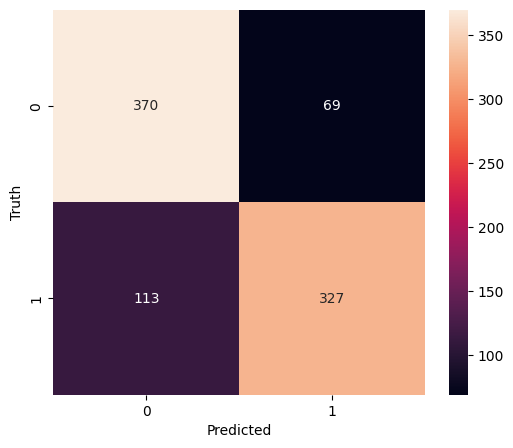

In [119]:
import seaborn as sn
plt.figure(figsize = (6,5))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [121]:
# Testing Samples

In [133]:
sample_texts = [
    "#I met with an accident.",
    "#The jungle fire was massive disaster."
]


In [135]:
sample_ds = tf.data.Dataset.from_tensor_slices(sample_texts).batch(32)
predictions = model.predict(sample_ds)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


In [137]:
pred_labels = (predictions > 0.5).astype(int)
print(pred_labels)

[[0]
 [1]]


# Saving the full model

In [143]:
model.save("/Users/ranjitsingh/Documents/Deep Learning/Test_Project/text_classification_model.keras")

In [147]:
import pickle

In [150]:

model_path = "/Users/ranjitsingh/Documents/Deep Learning/Test_Project/text_classification_model.keras"

# Saving pickle file in the same folder

pickle_file = "/Users/ranjitsingh/Documents/Deep Learning/Test_Project/model_path.pkl"
with open(pickle_file, "wb") as f:
    pickle.dump(model_path, f)

print("Pickle saved at:", pickle_file)

Pickle saved at: /Users/ranjitsingh/Documents/Deep Learning/Test_Project/model_path.pkl


# loading the trained model architecture + weights to use it for prediction

In [152]:
with open("/Users/ranjitsingh/Documents/Deep Learning/Test_Project/model_path.pkl", "rb") as f:
    path = pickle.load(f)

from tensorflow import keras
model = keras.models.load_model(path)


# You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8503
  Network URL: http://192.168.1.200:8503